# 7CS034 Data Science Group 15 Barabasi-Albert Model implementation

### Installing the NetworkX and Matplotlib libraries 

In [41]:
#pip install networkx
#pip install matplotlib
#pip install numpy

### Importing the Networkx and Matplotlib libraries

In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Assign network parameters (m>=1 and m < n)

In [43]:
n = 50
m = 5

Where,
- n is the Number of nodes which is an integer value
- m is the Number of edges to attach from a new node to existing nodes

### Variables to be used

In [44]:
# Stores the number of nodes
n_row = n
# Stores the number of edges
n_edges = m
# initialize graph
G = nx.Graph()
G2 = nx.Graph()

### Barabasi Albert Model (Growth Phase + Preferential Attachment)

In [45]:
def barabasi_albert_graph(n, m, seed=None):
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

### Create Barabasi-Albert scale free graph

In [46]:
# Create the network graph
G= nx.barabasi_albert_graph(n,m)
# Get all the node positions of the graph
node_pos = nx.spring_layout(G) 

### Network plots

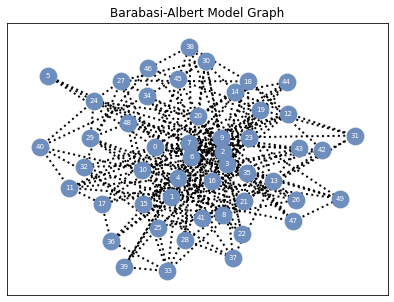

In [47]:
fig1 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1,2,1)
plt.title('Barabasi-Albert Model Graph')
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=7, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
fig1.savefig("Network_plot_n" + str(n_row) + "_m" + str(m) + ".png")

## Topological Properties

### Degree of Distribution for each Node in the Network

<Figure size 432x288 with 0 Axes>

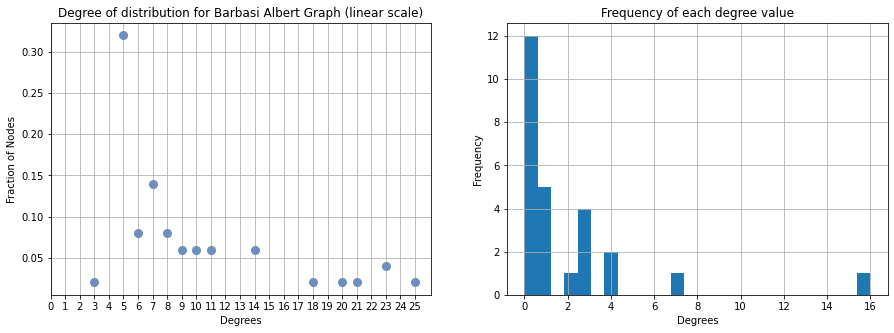

In [48]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# To get the degree of distribution values
degree_values = sorted(set(degrees.values()))
# Get the number of unique connections made in the Network
for i in range(len(degree_values)):
    unique_connections = list(degrees.values()).count(degree_values[i]) 
    #print('Degree', degree_values[i], ': has', unique_connections, 'portion of Nodes in the Network.', '\n' )
    
node_portion = [list(degrees.values()).count(i)/float(nodes) for i in degree_values]
#print('Fraction of Nodes:', node_portion, '\n')
plt.clf()
fig6 = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
# Plot the graph
plt.title('Degree of distribution for Barbasi Albert Graph (linear scale)')
plt.plot(degree_values, node_portion, linewidth=0, color='#6E8EBD', marker= 'o', markersize = 8)
plt.ylabel('Fraction of Nodes')
plt.xlabel('Degrees')
plt.xticks(np.arange(0, degree_values[len(degree_values)-1] + 1, 1))
plt.grid()
# Plot the frequency of each degree value
d1 = nx.degree_histogram(G)
plt.subplot(1,2,2)
plt.title('Frequency of each degree value')
plt.hist(d1, bins=len(d1))
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.grid()
plt.show()
fig6.savefig("DegreeDist_n" + str(n_row) + "_m" + str(m) + ".png")
#print('Frequency:', d1)

### Clustering Coefficient

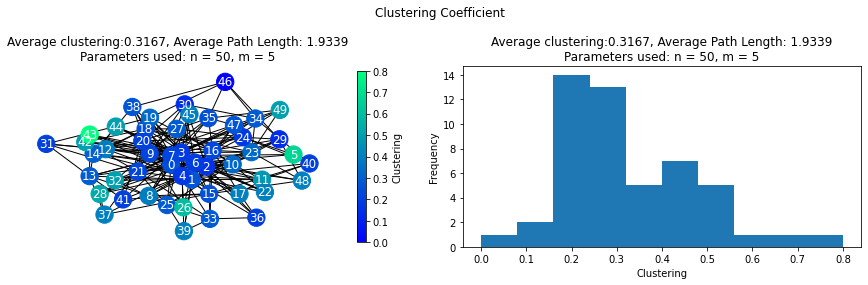

In [49]:
from matplotlib.cm import ScalarMappable

GC = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(GC)

cmap = plt.get_cmap('winter')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in GC.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(GC, node_color=node_colors, font_color='w', with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)
ax1.set_title('Average clustering:' + str(round(nx.average_clustering(G), 4)) + ', ' 
              + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n'
              + 'Parameters used: n = ' + str(n_row) + ', m = ' + str(n_edges))

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')
ax2.set_title('Average clustering:' + str(round(nx.average_clustering(G), 4)) + ', ' 
              + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n'
              + 'Parameters used: n = ' + str(n_row) + ', m = ' + str(n_edges))
fig.suptitle('Clustering Coefficient')
plt.tight_layout()
plt.show()
fig.savefig("Clustering_plot_n" + str(n_row) + "_m" + str(m) + ".png")

### Computting for the Shortest Path between two nodes

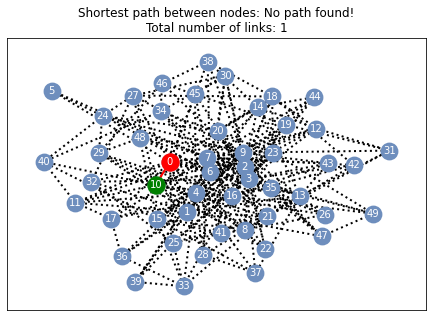

In [50]:
# https://stackoverflow.com/questions/57683321/edge-attributes-of-shortest-path-using-networkx
#Enter start node
st = 0 
#Enter end node
end = 10
# Gets the shortest between two nodes
path = nx.shortest_path(G)   
# Get a list of all the edges in the graph
path_edges = [list(u) for u in G.edges(data=False)]
# Creates the new edges list
n_edges = []
# Shortest path nodes
s_path = path[st][end]
# Convert shortest path list to string seperating each value with #
new_string = '#'.join(str(x) for x in s_path)
new_val = new_string
new_val2 = new_string[::-1]
# Get all the edge list between nodes
for i in range(len(path_edges)):
    n_path = path_edges[i]
    # Convert graph edges list to string seperating each value with #
    n_string = '#'.join(str(x) for x in n_path)
    # Check if the graph edges value is equal to shortest path values
    if  any(n_string.split('#')[1] == c for c in new_val.split('#')): 
        if any(n_string.split('#')[0] == c for c in new_val.split('#')):
            n_edges.append(n_path)

# Check if number of edges > 0
if len(n_edges) > 0:
    fig5 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=[st], node_color="r")
    nx.draw_networkx_nodes(G,node_pos, nodelist=[end], node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = n_edges, width=2.0, edge_color='r')
    # Check if the nodes is greater that 2
    if len(path[st][end]) > 2:
        plt.title('Shortest path between nodes ' + str(st) + ' and ' + str(end) 
                  + ' are ' + ' --> '.join(str(e) for e in (path[st][end])) 
                  + '\n' + 'Total number of links: ' + str(len(n_edges)))
    else:
        plt.title('Shortest path between nodes: No path found!' + '\n' + 'Total number of links: ' + str(len(n_edges)))
    fig5.savefig(str(st) + 's_' + str(end) +"e_ShortestPath_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the network size

In [51]:
print('Number of nodes in the graph', nx.number_of_nodes(G))

Number of nodes in the graph 50


### Finding number of edges in the graph

In [52]:
print('Number of edges in the graph', nx.number_of_edges(G))

Number of edges in the graph 225


## Other network properties

### Removing a Node from the network (Betweenness)

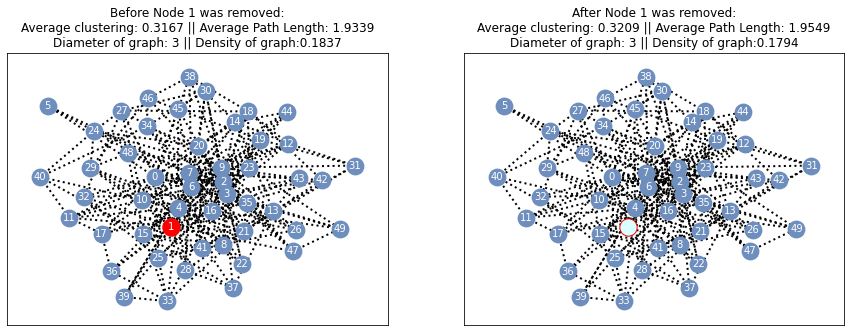

In [53]:
G2 = G
# Enter node id to be removed
node_id = 1

fig2 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1, 2, 1)
plt.title('Before Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[node_id], node_color="r")
before = list(G.edges)
G2.remove_node(node_id)
after = list(G2.edges)
plt.subplot(1, 2, 2)
plt.title('After Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G2), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G2), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G2)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))

nx.draw_networkx_nodes(G2, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G2, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G2, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G2,node_pos, nodelist=[node_id], edgecolors="r", node_color="#D9FFFFFF")

fig2.savefig("Network_betweenness_n" + str(n_row) + "_m" + str(m) + ".png")

### Degree centrality

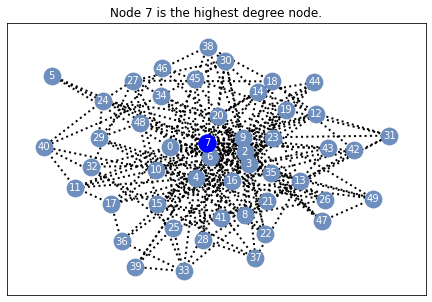

In [54]:
all_centr = dict(nx.degree_centrality(G))
keys_values = [key for key in all_centr.keys()]
obj_values = [all_centr[key] for key in keys_values]
highest_degr = keys_values[np.argmax(np.array(obj_values))]
fig3 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[highest_degr], node_color="b")
plt.title('Node ' + str(highest_degr) + ' is the highest degree node.')
fig3.savefig("Higest_Degree_node_" + str(n_row) + "_m" + str(m) + ".png")

### Finding the graphs density

In [55]:
print('Density of graph:', nx.density(G))

Density of graph: 0.179421768707483


### Raduis and diameter of the graph

In [56]:
print('Diameter of the graph: ' + str(nx.diameter(G)) + ', Raduis of graph: ' + str(nx.radius(G, e=None)))

Diameter of the graph: 3, Raduis of graph: 2


### Eccentrity

In [57]:
# eccentrity of node 2 & 5
print(dict(nx.eccentricity(G, v=[2, 5])))

{2: 3, 5: 3}


### Betweenness centrality

In [58]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.08359298267345777, 2: 0.04346195067511114, 3: 0.11811934710904892, 4: 0.09222494498083236, 5: 0.00023271276595744682, 6: 0.10989337148744609, 7: 0.11683184282114839, 8: 0.007926580948535863, 9: 0.0651743097942585, 10: 0.017487611408260575, 11: 0.004911035329918308, 12: 0.007867557797454882, 13: 0.01522547811558961, 14: 0.00935514009466039, 15: 0.027891032466190145, 16: 0.043220013325222954, 17: 0.006521370301290514, 18: 0.015928675558749834, 19: 0.01307375580979304, 20: 0.016482735587713956, 21: 0.022135773490983127, 22: 0.001213964856532046, 23: 0.013779468035637434, 24: 0.015582163571838167, 25: 0.012771474240889133, 26: 0.0005076170136010562, 27: 0.0075365713042054375, 28: 0.003991466648941452, 29: 0.00945823727621287, 30: 0.007350321950012851, 31: 0.002806823855043096, 32: 0.0012438559939342165, 33: 0.00935570290623482, 34: 0.01584052005464471, 35: 0.016939436154861685, 36: 0.003091051728019813, 37: 0.0020524659198340976, 38: 0.008147663143037795, 39: 0.0012421901384667344, 4

### Closeness centrality

In [59]:
print(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))

{0: 0.631578947368421, 2: 0.5517241379310345, 3: 0.6486486486486487, 4: 0.631578947368421, 5: 0.4444444444444444, 6: 0.6486486486486487, 7: 0.6666666666666666, 8: 0.5454545454545454, 9: 0.6, 10: 0.5517241379310345, 11: 0.4948453608247423, 12: 0.5393258426966292, 13: 0.5052631578947369, 14: 0.5393258426966292, 15: 0.5517241379310345, 16: 0.5783132530120482, 17: 0.5, 18: 0.5333333333333333, 19: 0.5274725274725275, 20: 0.5454545454545454, 21: 0.5517241379310345, 22: 0.5052631578947369, 23: 0.5274725274725275, 24: 0.5274725274725275, 25: 0.5052631578947369, 26: 0.5, 27: 0.4948453608247423, 28: 0.5161290322580645, 29: 0.4752475247524752, 30: 0.4897959183673469, 31: 0.4485981308411215, 32: 0.4752475247524752, 33: 0.48, 34: 0.5161290322580645, 35: 0.5052631578947369, 36: 0.4444444444444444, 37: 0.45714285714285713, 38: 0.5106382978723404, 39: 0.4528301886792453, 40: 0.4528301886792453, 41: 0.4752475247524752, 42: 0.4897959183673469, 43: 0.48, 44: 0.4897959183673469, 45: 0.5052631578947369, 46

### Edgebetweenness

In [60]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))

{(0, 2): 0.011606654957626642, (0, 3): 0.00773500903906327, (0, 4): 0.010527066737231727, (0, 5): 0.016615023534666387, (0, 6): 0.009770080274722348, (0, 7): 0.005054747720971819, (0, 8): 0.006247748016955702, (0, 9): 0.007832502646954459, (0, 10): 0.006981646825396826, (0, 11): 0.010050035942893084, (0, 13): 0.010180367738422425, (0, 14): 0.00863599062813531, (0, 17): 0.009950581825581829, (0, 25): 0.012176935168006593, (0, 27): 0.011596825230186182, (0, 28): 0.008730994807793947, (0, 32): 0.013955701328150306, (0, 35): 0.013389143536202361, (0, 38): 0.012246309057533546, (0, 45): 0.007895009908097751, (2, 6): 0.009187739871276156, (2, 8): 0.00787209005435083, (2, 10): 0.008668454945584218, (2, 14): 0.007825256713679356, (2, 18): 0.008735455762391537, (2, 22): 0.0063178844865203615, (2, 23): 0.006763615792009758, (2, 30): 0.008872977552355771, (2, 36): 0.012260880181798548, (2, 41): 0.01007928226517607, (2, 44): 0.005466483130048556, (2, 47): 0.011098655019841915, (2, 48): 0.009436882

### Transitivity

In [61]:
print(nx.transitivity(G))

0.23490813648293962


### Finding a node neighbors and non neighbors

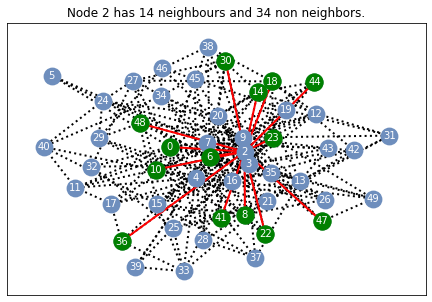

In [62]:
node_id = 2
#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html
dict_value = nx.all_neighbors(G, node_id)
list_value = [item for item in dict_value]
# Non neighbors
dict_value_non = nx.non_neighbors(G, node_id)
list_value_non = [item for item in dict_value_non]
# get the links
new_edges = []
for n in list_value:
    new_edges.append([n, node_id])
                      
if len(new_edges) > 0:
    fig4 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=list_value, node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
    plt.title('Node ' + str(node_id) + ' has ' + str(len(list_value)) + ' neighbours and ' 
              + str(len(list_value_non)) + ' non neighbors.')
    fig4.savefig(str(node_id) + "_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the common neighbors for two nodes

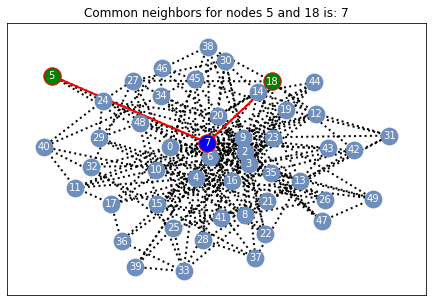

In [63]:
first_node = 5
second_node = 18

common = nx.common_neighbors(G, first_node, second_node)
common_list = [item for item in common]
# get the links
new_edges = []
for n in common_list:
    new_edges.append([first_node, n])
    new_edges.append([second_node, n])
    
fig7 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[first_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=[second_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=common_list, edgecolors="r", node_color="b")
nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
if len(common_list) > 0:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + ', '.join(str(e) for e in common_list))
else:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + 'None')
fig7.savefig(str(first_node) + '_' + str(second_node) + "Common_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Size of the network

In [64]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
print('Total number of nodes on the graph:', nodes)

Total number of nodes on the graph: 49.0


### Network Nodes Characteristics

In [65]:
# Get the dictionary keys
dict_keys = list(degrees.keys())
# Get the dictionary objects
dict_objs = [degrees[key] for key in degrees.keys()]

new_array = np.array(dict_objs)
max_index = np.argmax(new_array)

print('Nodes and the number of edges made to an existing Node in the network:', '\n')
print('Node ID:','\n', dict_keys, '\n')
print('Number of Edges:','\n', dict_objs, '\n')
print('Node', dict_keys[max_index], 'has the higest number of connected edges of value',new_array[max_index])

Nodes and the number of edges made to an existing Node in the network: 

Node ID: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 

Number of Edges: 
 [21, 14, 14, 23, 20, 3, 23, 25, 9, 18, 11, 7, 8, 10, 9, 11, 14, 6, 10, 7, 10, 11, 5, 9, 8, 8, 5, 7, 6, 7, 7, 5, 5, 7, 7, 8, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5] 

Node 7 has the higest number of connected edges of value 25


### Adjacency matrix

In [66]:
# https://www.slideshare.net/rik0/complex-and-social-network-analysis-in-python/9-Average_geodesic_distance_i_n
# Get the matrix values
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 1., 1., 0.],
        [1., 0., 0., ..., 1., 0., 1.],
        ...,
        [0., 1., 1., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 0., 0.]])

### Average path length

In [67]:
average_shortest_path = nx.average_shortest_path_length(G)
print('Average length of shortest path:', average_shortest_path)

Average length of shortest path: 1.9549319727891157


### Clustering and Clustering Coefficient

In [68]:
print(nx.clustering(G))

{0: 0.23684210526315788, 2: 0.16483516483516483, 3: 0.17786561264822134, 4: 0.17894736842105263, 5: 0.6666666666666666, 6: 0.19047619047619047, 7: 0.20652173913043478, 8: 0.3888888888888889, 9: 0.20588235294117646, 10: 0.26666666666666666, 11: 0.4666666666666667, 12: 0.39285714285714285, 13: 0.2777777777777778, 14: 0.3055555555555556, 15: 0.2545454545454545, 16: 0.21978021978021978, 17: 0.4, 18: 0.24444444444444444, 19: 0.3333333333333333, 20: 0.2, 21: 0.2, 22: 0.4, 23: 0.3333333333333333, 24: 0.17857142857142858, 25: 0.2857142857142857, 26: 0.6, 27: 0.2857142857142857, 28: 0.5333333333333333, 29: 0.13333333333333333, 30: 0.14285714285714285, 31: 0.2, 32: 0.6666666666666666, 33: 0.2857142857142857, 34: 0.2857142857142857, 35: 0.25, 36: 0.16666666666666666, 37: 0.4, 38: 0.26666666666666666, 39: 0.5, 40: 0.2, 41: 0.2, 42: 0.5, 43: 0.8333333333333334, 44: 0.5, 45: 0.4, 46: 0, 47: 0.3, 48: 0.4, 49: 0.5}


### List of Connected Nodes

In [69]:
a = list(nx.connected_components(G))
print('List of connected components:', '\n', a)

List of connected components: 
 [{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]


## Number of node neighbours in the network

In [70]:
print('Node positions:', '\n', node_pos)

Node positions: 
 {0: array([-0.25476015,  0.09172266]), 1: array([-0.15371861, -0.3091392 ]), 2: array([0.17287225, 0.05431265]), 3: array([ 0.19627327, -0.04443384]), 4: array([-0.10745653, -0.16152633]), 5: array([-0.93010811,  0.66916884]), 6: array([-0.02576243,  0.01329983]), 7: array([-0.04000183,  0.125658  ]), 8: array([ 0.17455023, -0.45551862]), 9: array([0.16208789, 0.16719056]), 10: array([-0.3341223 , -0.09195798]), 11: array([-0.79360169, -0.23847281]), 12: array([0.58212819, 0.36251951]), 13: array([ 0.48919647, -0.18195806]), 14: array([0.24846372, 0.53694793]), 15: array([-0.32717724, -0.37146897]), 16: array([ 0.10051892, -0.18295978]), 17: array([-0.59012699, -0.3669399 ]), 18: array([0.3299655 , 0.62192037]), 19: array([0.40829451, 0.39342133]), 20: array([0.01814787, 0.34296122]), 21: array([ 0.30226772, -0.348266  ]), 22: array([ 0.29049521, -0.6088536 ]), 23: array([0.33554644, 0.16581405]), 24: array([-0.63896604,  0.4639922 ]), 25: array([-0.23508124, -0.56069

### References

[1]https://networkx.org/

[2]https://www.tutorialspoint.com/python_data_science/python_matplotlib.htm

[3]https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

[4]https://hal.archives-ouvertes.fr/hal-00940688/document

[5]https://stackoverflow.com/questions/64485434/how-to-plot-the-distribution-of-a-graphs-clustering-coefficient